In [435]:
import os
os.chdir('./')

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content

chat = read_file('./faith.txt')

In [438]:
import datetime
# Remove elements that are not date
len(chat) #33563

for i in range(len(chat)):
  try:
    datetime.datetime.strptime(chat[i].split(',')[0], '%d/%m/%Y') #Converts string date into a date object
  except ValueError: #Returns an error if the string is not a datetime object
    chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the next line to the previous line
    chat[i] = "NA" #Replace the unwanted text element with 'NA'
    
#Handle more than double-line texting
for i in range(len(chat)):
  if chat[i].split(' ')[0] == 'NA':
    chat[i] = 'NA'
    
while True:
    try:
        chat.remove("NA")
    except ValueError:
        break
        
len(chat) #33425


676

In [439]:
date = [chat[i].split(',')[0] for i in range(len(chat))]

In [440]:
def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [441]:
## Get time
time = [chat[i].split(',')[1].split('-')[0] for i in range(len(chat))]
time = [s.strip(' ') for s in time] # Remove spacing  

## Get name
name = [chat[i].split('-')[1].split(':')[0] for i in range(len(chat))]

In [442]:
## Get content
content = []
for i in range(len(chat)):
  try:
    content.append(chat[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')

In [443]:
import pandas as pd
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])

In [444]:
df = df.loc[df['Content'] != 'Missing Text']

In [445]:
df.dtypes

Date       object
Time       object
Name       object
Content    object
dtype: object

In [446]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [447]:
df.dtypes

Date       datetime64[ns]
Time               object
Name               object
Content            object
dtype: object

In [448]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [451]:
# Get the distribution per sender
df_freq = df.pivot_table(index=['Name'], values=['Content'], aggfunc='count')

In [452]:
# Reset index
df_freq.reset_index(inplace=True)

In [453]:
df_freq.head()

,Name,Content
0,Faith Mbodze,330
1,Franklin Okech,345


In [454]:
# Rename cols
df_freq.rename(columns={'Content': 'Messages'}, inplace=True)

# Preview
df_freq.head()

,Name,Messages
0,Faith Mbodze,330
1,Franklin Okech,345


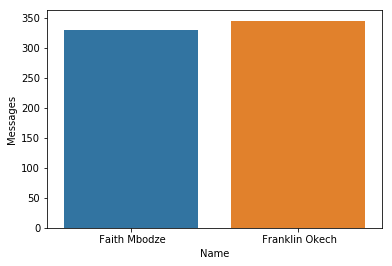

In [455]:
sns.barplot(x = df_freq.Name, y = df_freq.Messages)

In [456]:
daily = df.resample('D', on='Date').count()

# Preview
daily.head()

,Date,Time,Name,Content
Date,,,,
2020-03-24,16,16,16,16
2020-03-25,77,77,77,77
2020-03-26,47,47,47,47
2020-03-27,0,0,0,0
2020-03-28,61,61,61,61


In [389]:
daily.drop(columns=['Date'], inplace=True)

In [390]:
daily.reset_index(inplace=True)

In [391]:
daily

,Date,Time,Name,Content
0,2020-03-24,16,16,16
1,2020-03-25,77,77,77
2,2020-03-26,47,47,47
3,2020-03-27,0,0,0
4,2020-03-28,61,61,61
5,2020-03-29,43,43,43
6,2020-03-30,12,12,12
7,2020-03-31,18,18,18
8,2020-04-01,138,138,138
9,2020-04-02,155,155,155


In [392]:
daily['day_of_week'] =  daily['Date'].dt.day_name()

In [393]:
daily

,Date,Time,Name,Content,day_of_week
0,2020-03-24,16,16,16,Tuesday
1,2020-03-25,77,77,77,Wednesday
2,2020-03-26,47,47,47,Thursday
3,2020-03-27,0,0,0,Friday
4,2020-03-28,61,61,61,Saturday
5,2020-03-29,43,43,43,Sunday
6,2020-03-30,12,12,12,Monday
7,2020-03-31,18,18,18,Tuesday
8,2020-04-01,138,138,138,Wednesday
9,2020-04-02,155,155,155,Thursday


In [394]:
# Get the mean for chats for weekday
day_of_week = daily.pivot_table(index=['day_of_week'], values=['Content'], aggfunc='mean')

# Preview
day_of_week.head()

,Content
day_of_week,
Friday,54.0
Monday,12.0
Saturday,61.0
Sunday,43.0
Thursday,101.0


In [396]:
# Reset index
day_of_week.reset_index(inplace=True)

# Sort
day_of_week.sort_values(['Content'], ascending=[False], inplace=True)

# Preview
day_of_week.head()

,index,day_of_week,Content
0,6,Wednesday,107.5
1,4,Thursday,101.0
2,2,Saturday,61.0
3,0,Friday,54.0
4,3,Sunday,43.0


In [401]:
day_of_week.rename(columns={'Content': 'Messages'}, inplace=True)

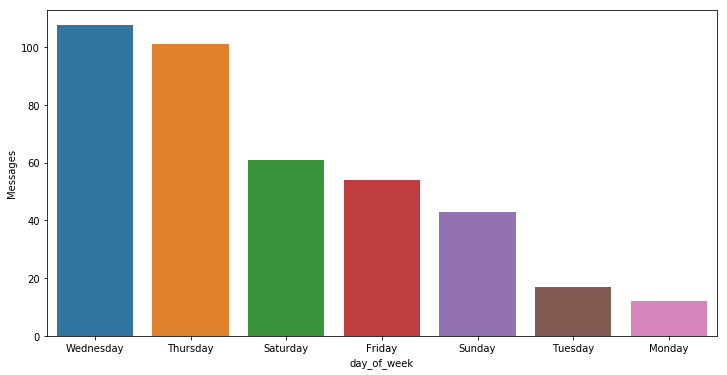

In [402]:
# day of week average chats
plt.figure(figsize=(12, 6))

sns.barplot(x = day_of_week.day_of_week, y = day_of_week.Messages)

In [416]:
weekly = df.resample('W', on='Date').count()

# Preview
weekly.head()

,Date,Time,Name,Content
Date,,,,
2020-03-29,244,244,244,244
2020-04-05,431,431,431,431


In [417]:
weekly.drop(columns=['Date'], inplace=True)

In [418]:
weekly.reset_index(inplace=True)

In [419]:
weekly

,Date,Time,Name,Content
0,2020-03-29,244,244,244
1,2020-04-05,431,431,431


In [420]:
# rename
weekly.rename(columns={'Date': 'Week', 'Content': 'Messages'}, inplace=True)

In [421]:
weekly

,Week,Time,Name,Messages
0,2020-03-29,244,244,244
1,2020-04-05,431,431,431


In [422]:
weekly['Week'] = pd.to_datetime(weekly['Week']).dt.date

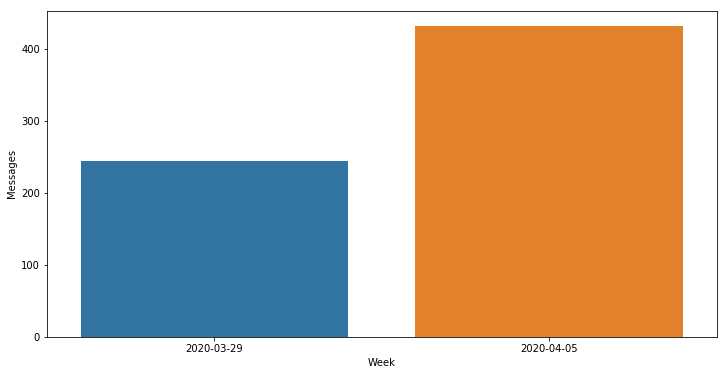

In [423]:
# weekly
plt.figure(figsize=(12, 6))

sns.barplot(x = weekly.Week, y = weekly.Messages)

In [426]:
monthly = df.resample('M', on='Date').count()

# Preview
monthly.head()

,Date,Time,Name,Content
Date,,,,
2020-03-31,274,274,274,274
2020-04-30,401,401,401,401


In [427]:
monthly.drop(columns=['Date'], inplace=True)

In [428]:
monthly.reset_index(inplace=True)

In [429]:
monthly

,Date,Time,Name,Content
0,2020-03-31,274,274,274
1,2020-04-30,401,401,401


In [430]:
monthly['month_of_year'] =  monthly['Date'].dt.month_name()

In [431]:
monthly

,Date,Time,Name,Content,month_of_year
0,2020-03-31,274,274,274,March
1,2020-04-30,401,401,401,April


In [432]:
# Rename cols
monthly.rename(columns={'Content': 'Messages'}, inplace=True)

In [433]:
monthly

,Date,Time,Name,Messages,month_of_year
0,2020-03-31,274,274,274,March
1,2020-04-30,401,401,401,April


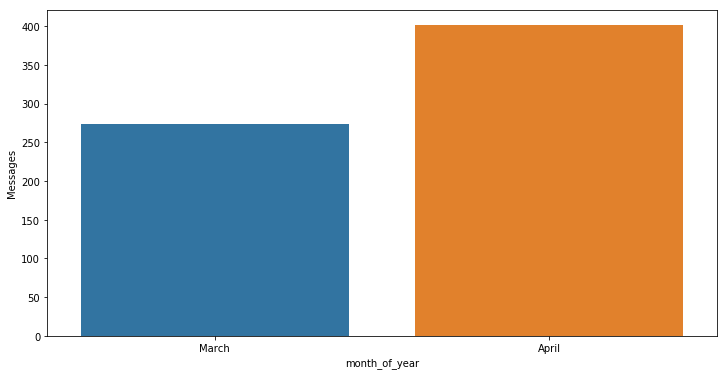

In [434]:
# Plot
# monthly
plt.figure(figsize=(12, 6))

sns.barplot(x = monthly.month_of_year, y = monthly.Messages)